In [7]:
import pandas as pd 
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns 

In [8]:
from sklearn.datasets import load_iris

In [9]:
iris=load_iris()

In [10]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [12]:
x=pd.DataFrame(data=iris.data,columns=iris.feature_names)
y=iris.target

In [13]:
x
print(y)
target_name=iris.target_names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [36]:
df=x.copy(deep=True)
df['species']=y
df['species']=df['species'].map({0:target_name[0],1:target_name[1],2:target_name[2]})
x.drop(columns="species",inplace=True)
print(df)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)    species
0                  5.1               3.5  ...               0.2     setosa
1                  4.9               3.0  ...               0.2     setosa
2                  4.7               3.2  ...               0.2     setosa
3                  4.6               3.1  ...               0.2     setosa
4                  5.0               3.6  ...               0.2     setosa
..                 ...               ...  ...               ...        ...
145                6.7               3.0  ...               2.3  virginica
146                6.3               2.5  ...               1.9  virginica
147                6.5               3.0  ...               2.0  virginica
148                6.2               3.4  ...               2.3  virginica
149                5.9               3.0  ...               1.8  virginica

[150 rows x 5 columns]


## visualization 
so we gonna use following graph for our data visualizaiton 
1. count plot
2. pair plot 
3. box plot 

<Axes: xlabel='species', ylabel='count'>

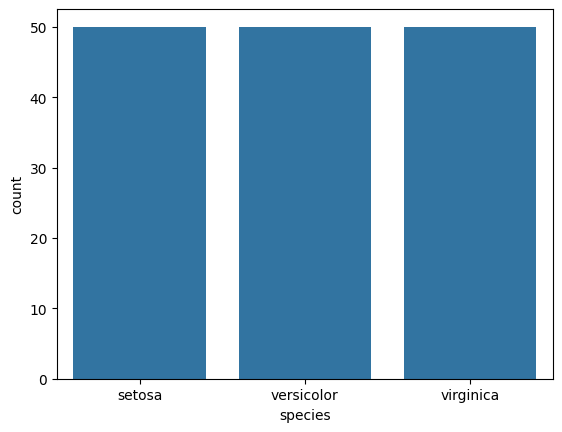

In [32]:
# visualization
sns.countplot(data=df,x="species")
## we can tell that the classes are balanced 


<Figure size 1200x1000 with 0 Axes>

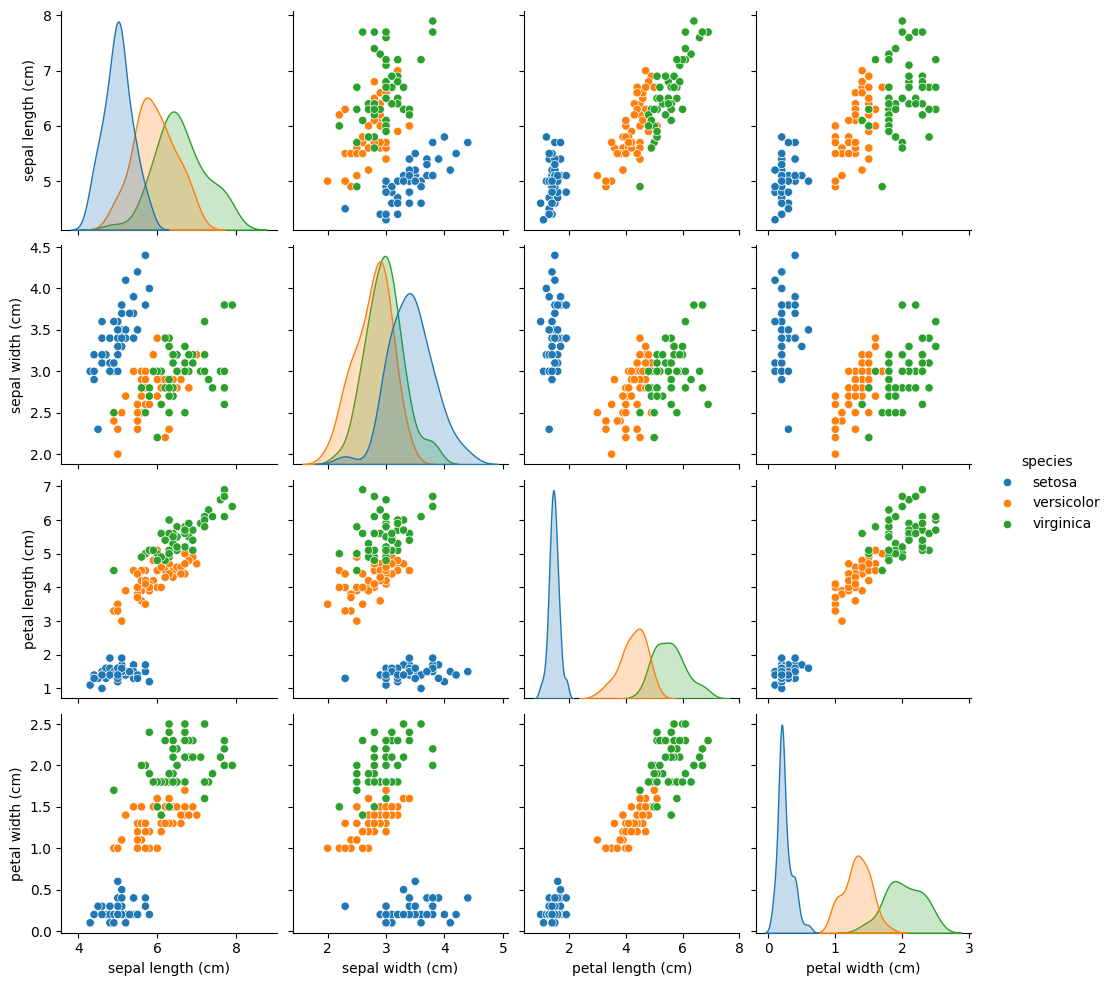

In [33]:
plt.figure(figsize=(12,10))
sns.pairplot(data=df,hue="species")

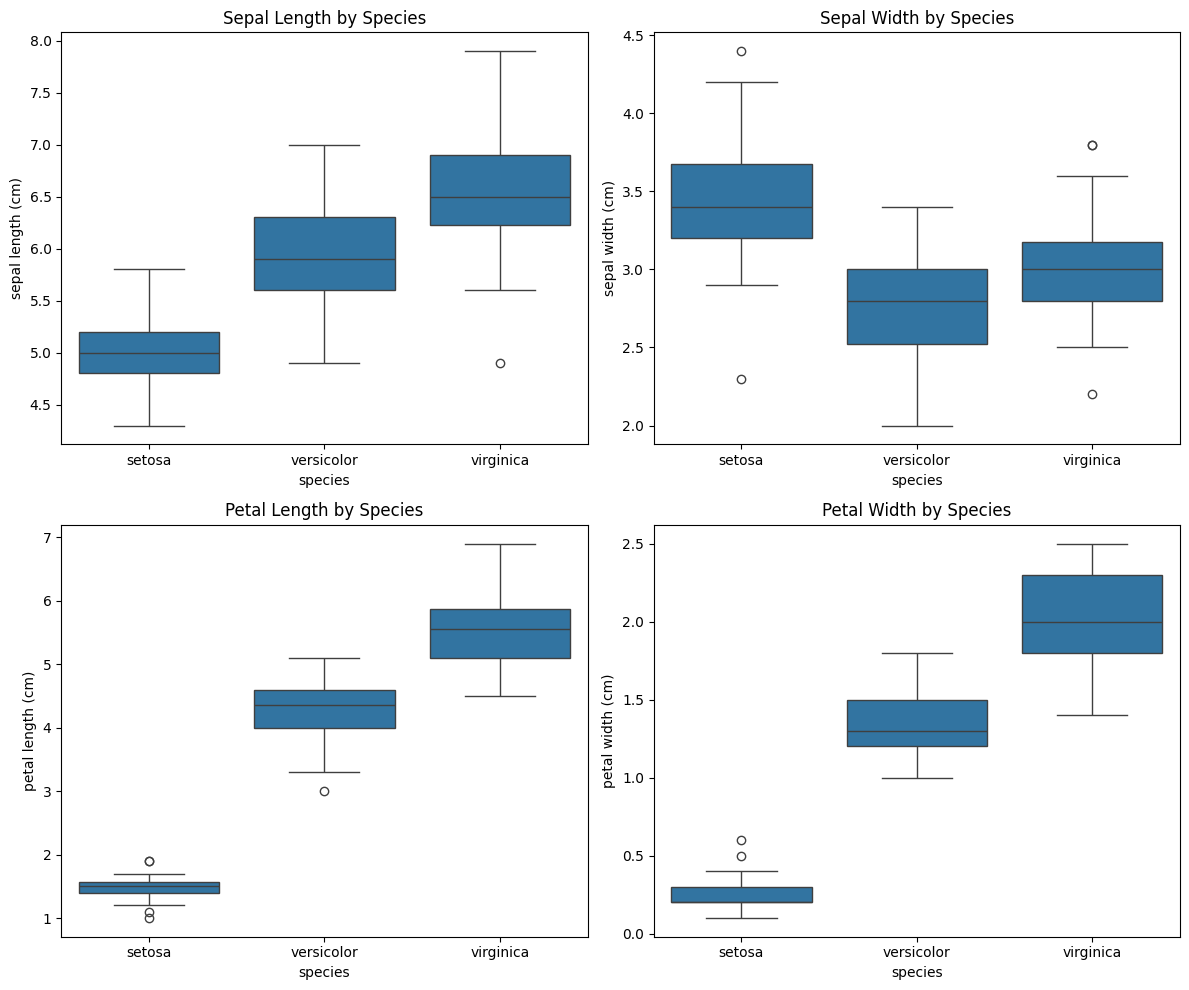

In [34]:
plt.figure(figsize=(12, 10))

# Plot 1: Sepal Length
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='species', y='sepal length (cm)')
plt.title('Sepal Length by Species')

# Plot 2: Sepal Width
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='species', y='sepal width (cm)')
plt.title('Sepal Width by Species')

# Plot 3: Petal Length
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='species', y='petal length (cm)')
plt.title('Petal Length by Species')

# Plot 4: Petal Width
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='species', y='petal width (cm)')
plt.title('Petal Width by Species')

plt.tight_layout() # Adjusts plots to prevent overlap
plt.show()

<Axes: >

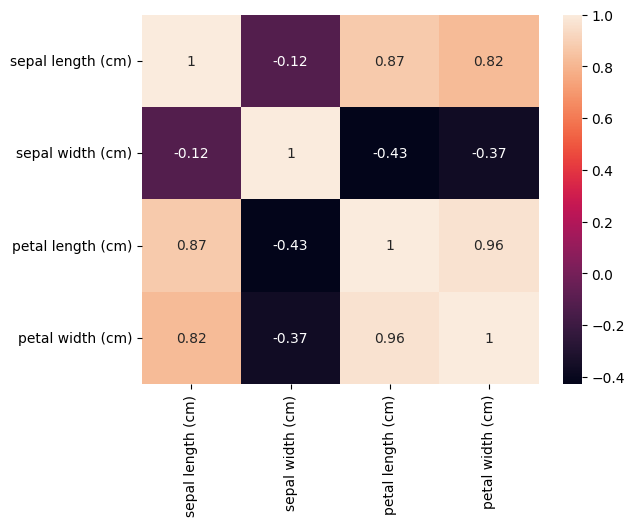

In [37]:

cor=x.corr()
sns.heatmap(cor,annot=True)


Group 1 (Sensitive): LogisticRegression, KNN, and SVM are all sensitive to the scale of your features. LogisticRegression is also sensitive to multicollinearity (your petal length vs. petal width problem).

Group 2 (Insensitive): DecisionTree, RandomForest, Naive Bayes, and all Ensemble techniques are not sensitive to feature scale or multicollinearity.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score,classification_report


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [46]:
def get_features_to_drop(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i] # Get name of column
                col_corr.add(colname)
    return list(col_corr)

# Get list of features to drop (e.g., ['petal width (cm)'])
features_to_drop = get_features_to_drop(x, 0.85)
print(f"Found highly correlated features to drop: {features_to_drop}")

# Get list of features TO KEEP for our linear models
all_features = x.columns.tolist()
features_to_keep = [f for f in all_features if f not in features_to_drop]
print(f"Features to keep for Linear/KNN/SVM: {features_to_keep}")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

Found highly correlated features to drop: ['petal width (cm)', 'petal length (cm)']
Features to keep for Linear/KNN/SVM: ['sepal length (cm)', 'sepal width (cm)']


In [51]:
preprocessor_group1 = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), features_to_keep)
    ],
    remainder='drop' # Drop all other columns (like the redundant petal feature)
)

# --- 6. Create the Model Dictionary with Pipelines ---

models = {
    # --- Group 1: Use the new preprocessor ---
    # This pipeline will first select/scale, then pass to the model
    "Logistic Regression": Pipeline([
        ('preprocessor', preprocessor_group1),
        ('model', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    
    "K-Nearest Neighbors (KNN)": Pipeline([
        ('preprocessor', preprocessor_group1),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ]),
    
    "Support Vector (SVM)": Pipeline([
        ('preprocessor', preprocessor_group1),
        ('model', SVC(probability=True, random_state=42))
    ]),
    
    # --- Group 2: No preprocessing needed ---
    # These models get the raw, full X_train with all 4 features
    
    "Naive Bayes (Gaussian)": GaussianNB(),
    
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    
    "Random Forest": RandomForestClassifier(random_state=42),
    
    "AdaBoost": AdaBoostClassifier(random_state=42),
    
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}


# --- 7. Train, Evaluate, and Store Results ---
print("\nStarting model training and evaluation...")
results_list = []

for name, model in models.items():
    
    # Train the model
    # For Group 1, fit() will trigger the preprocessor
    # For Group 2, fit() will use the raw X_train
    model.fit(x_train, y_train)
    
    # Make predictions
    # The pipeline automatically uses the correct features
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Get the full classification report
    report = classification_report(y_test, y_pred, target_names=iris.target_names, output_dict=True)
    
    # Store results
    results_list.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1-Score (macro avg)": report['macro avg']['f1-score']
    })
    
    print(f"Finished: {name}")

print("\nEvaluation complete!")


# --- 8. Display the Final Comparison ---
results_df = pd.DataFrame(results_list)
results_df_sorted = results_df.sort_values(by="F1-Score (macro avg)", ascending=False)


Starting model training and evaluation...
Finished: Logistic Regression
Finished: K-Nearest Neighbors (KNN)
Finished: Support Vector (SVM)
Finished: Naive Bayes (Gaussian)
Finished: Decision Tree
Finished: Random Forest
Finished: AdaBoost
Finished: Gradient Boosting
Finished: XGBoost

Evaluation complete!


c:\Users\sasmi\anaconda3\envs\dsenv\lib\site-packages\xgboost\training.py:199: UserWarning: [13:22:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [1]:
results_df_sorted

NameError: name 'results_df_sorted' is not defined